## Goals
* Generate some molecule data
* Plot histograms of data
* Explore dealing with categorical grouping

In [1]:
from __future__ import print_function

# import OE tools and data
import oenotebook as oenb
# oenb.capture_errors()
import warnings
warnings.filterwarnings("ignore")

from openeye.oechem import OECalculateMolecularWeight
from openeye.oemolprop import OEGetXLogP, OEGet2dPSA, OEGetFractionCsp3, OEGetAromaticRingCount



from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


import seaborn as sns
sns.set_context("poster")


<!-- fold -->

In [2]:
# Read molecules into a Pandas Dataframe
df = oenb.read_file_to_dataframe("./eMol_ran200.ism", title_col="Title")

# Calculate some Properties
df["MW"] = df.Molecule.apply(OECalculateMolecularWeight)
df["XlogP"] = df.Molecule.apply(OEGetXLogP)
df["2D_PSA"] = df.Molecule.apply(OEGet2dPSA)
df["NumAtoms"] = df.Molecule.apply(lambda x: x.NumAtoms())
df["FractCsp3"] = df.Molecule.apply(OEGetFractionCsp3)
df["AromRngCt"] = df.Molecule.apply(OEGetAromaticRingCount)

# Check to make sure data looks right
df.describe()

,MW,XlogP,2D_PSA,NumAtoms,FractCsp3,AromRngCt
count,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000
mean,396.262860,3.314230,75.410948,27.6300,0.281727,2.645000
std,75.702234,1.677175,25.521730,5.5241,0.173856,0.971439
min,202.206000,-1.803000,15.709999,15.0000,0.000000,0.000000
25%,339.013895,2.276000,58.440002,23.0000,0.165000,2.000000
50%,395.408540,3.223500,74.005005,28.0000,0.250000,3.000000
75%,449.514272,4.324750,92.802494,31.0000,0.382937,3.000000
max,720.856340,8.599002,164.720001,51.0000,0.923077,5.000000


,Molecule,Title,MW,XlogP,2D_PSA,NumAtoms,FractCsp3,AromRngCt
0,,850317,225.244400,-0.809,84.220001,16,0.500000,1
1,,29605860,305.276126,2.339,38.769997,22,0.187500,2
2,,25756892,324.333940,0.147,100.290001,28,0.352941,2

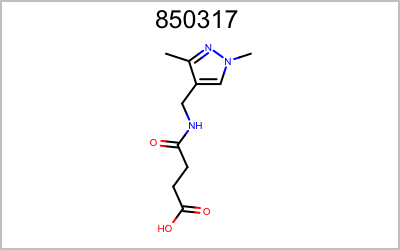
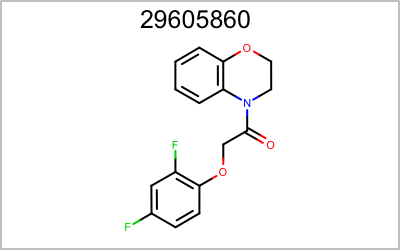
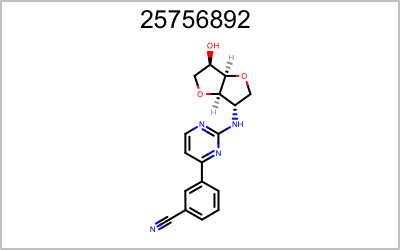

In [3]:
oenb.render_dataframe(df.head(3))

## Histograms

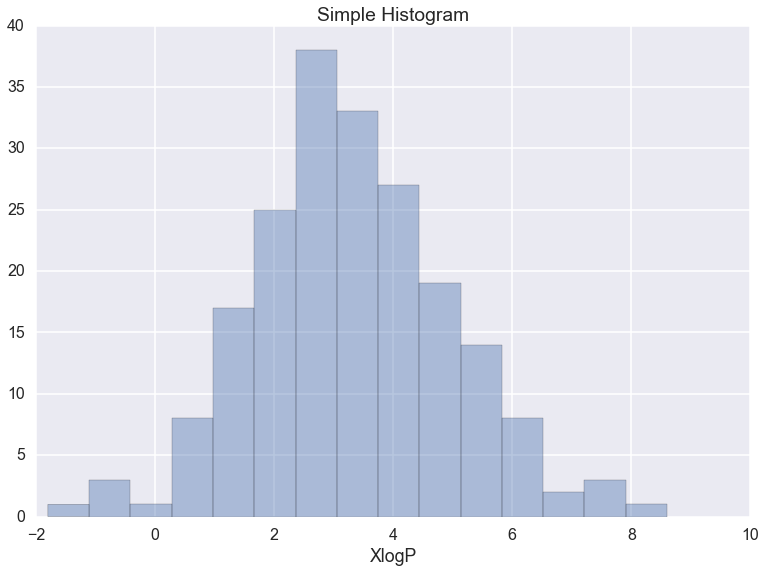

In [20]:
sns.distplot(df.XlogP,kde=False)
plt.title("Simple Histogram");

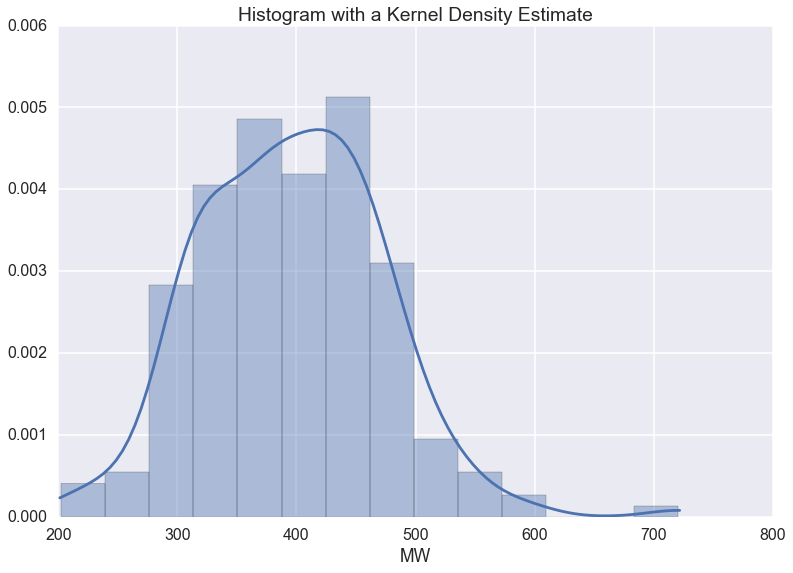

In [21]:
sns.distplot(df.MW)
plt.title("Histogram with a Kernel Density Estimate");

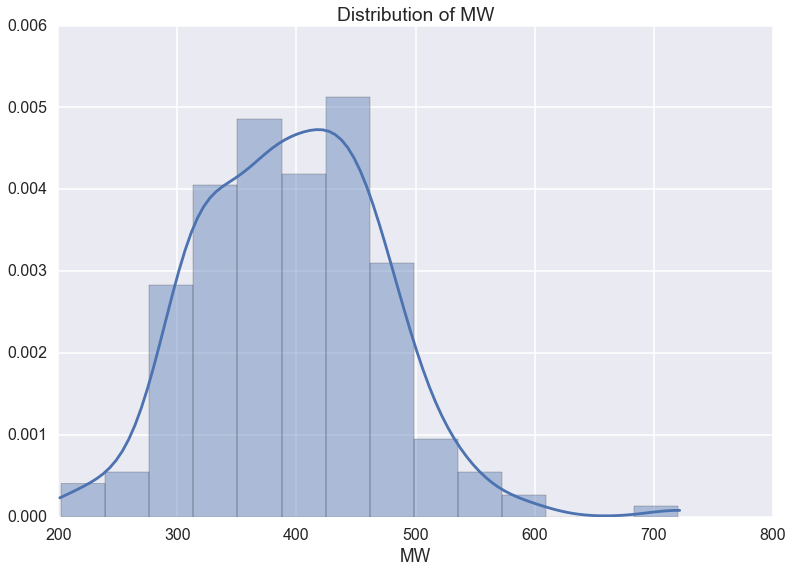

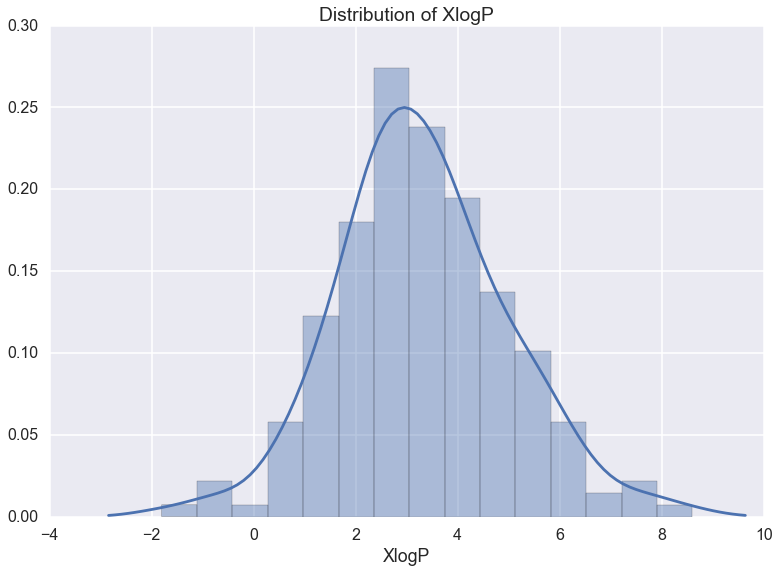

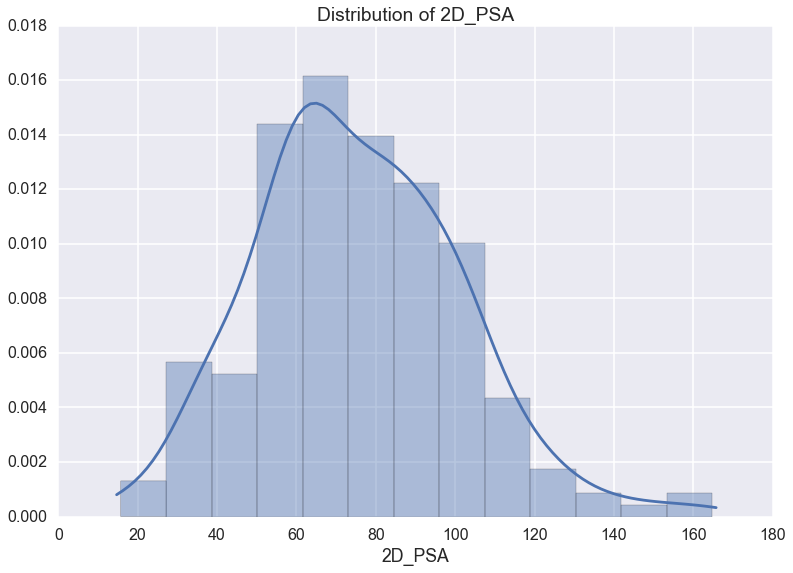

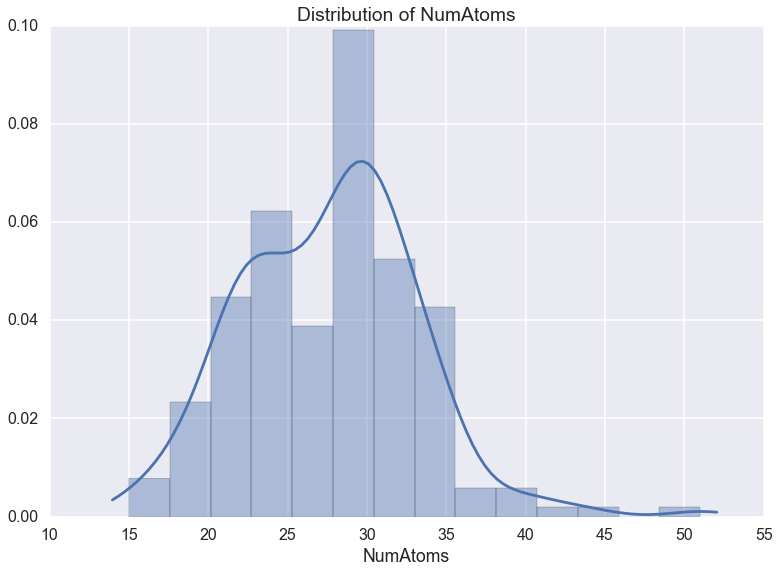

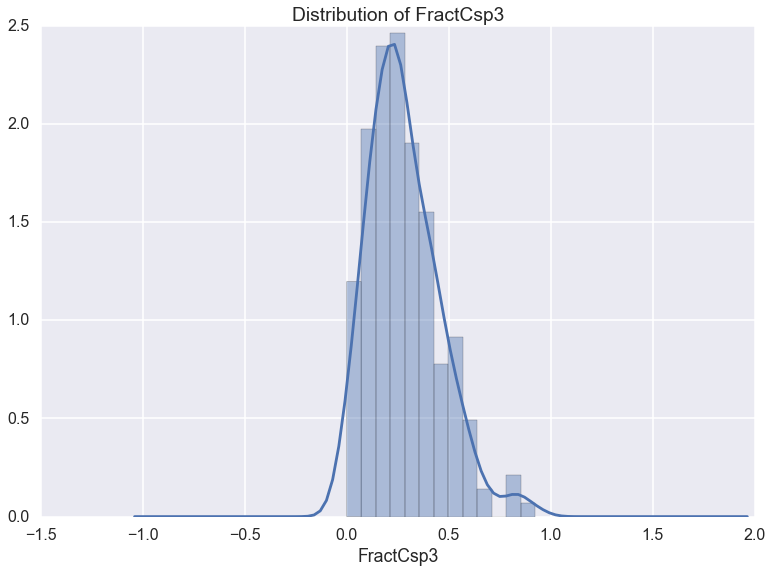

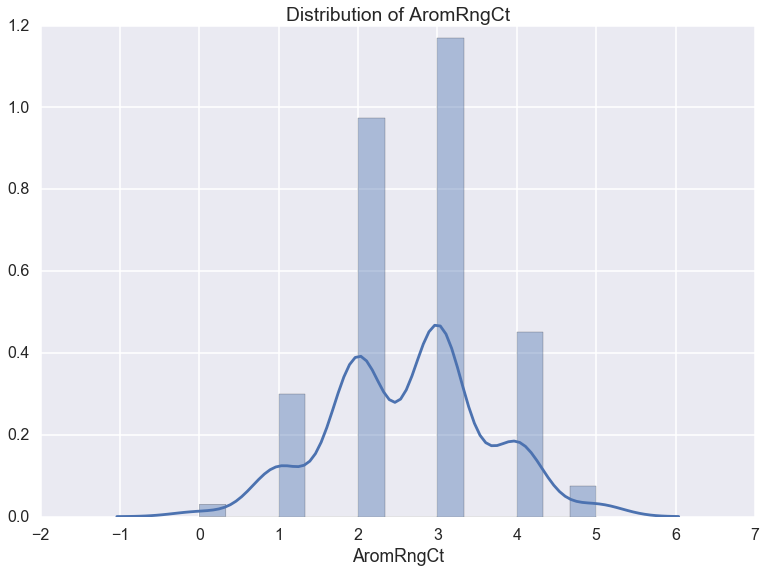

In [22]:
for c in ["MW","XlogP","2D_PSA","NumAtoms","FractCsp3","AromRngCt"]:
    sns.distplot(df[c])
    plt.title("Distribution of {}".format(c))
    plt.show()
    plt.close()

You can see that while the KDE makes sense for many continuous properties, it doesn't do a good job of representing bounded, ordinal, or categorical data.

Seaborn provides many high-level functions for creating several plots at once.
Pairplot provides a nice way to compare several molecular properties to each other.

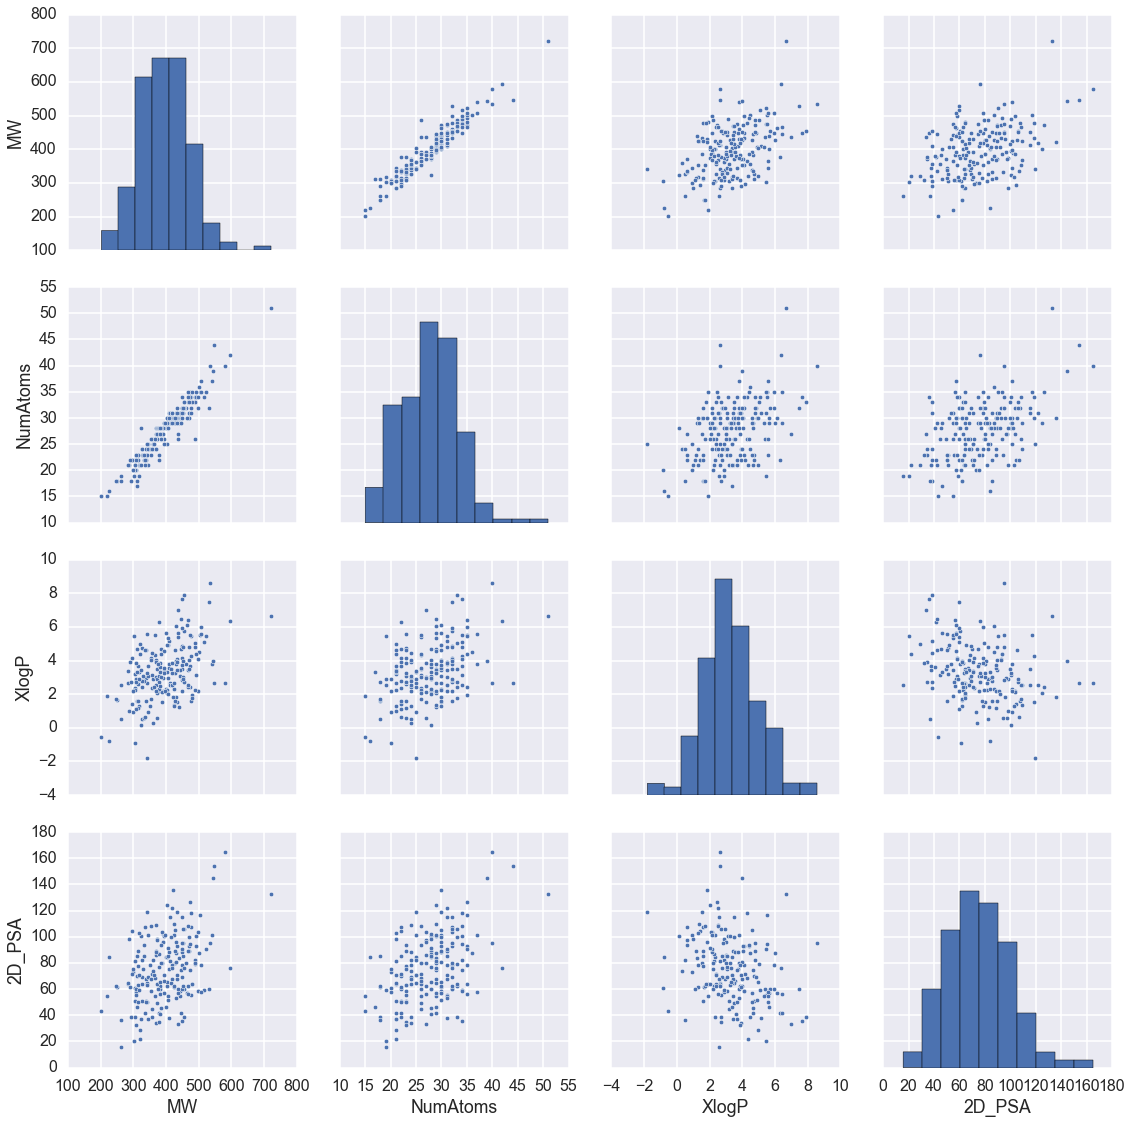

In [23]:
sns.pairplot(df[["MW","NumAtoms","XlogP","2D_PSA"]],size=4);

In [ ]:
df[["MW","2D_PSA"]].plot.box(notch=True);

In [ ]:
sns.boxplot(data=df, y="MW", x="AromRngCt", order=sorted(df.AromRngCt.unique()));

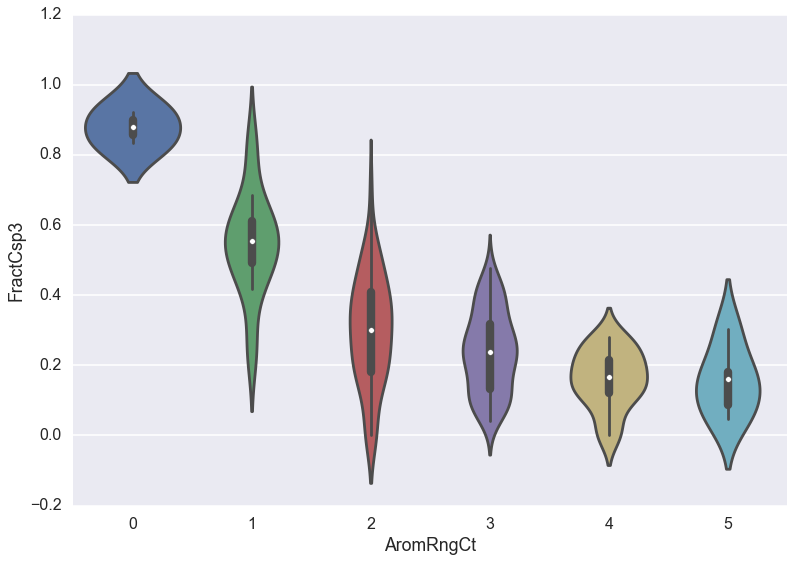

In [24]:
sns.violinplot(data=df, y="FractCsp3", x="AromRngCt", order=sorted(df.AromRngCt.unique()));

In [25]:
# Lets create some fake clusters
fake_clusters = ["A","B","C","D"]
fake_probs = [0.5,0.2,0.25,0.05]
df["Cluster"] = np.random.choice(fake_clusters,size=len(df),p=fake_probs)

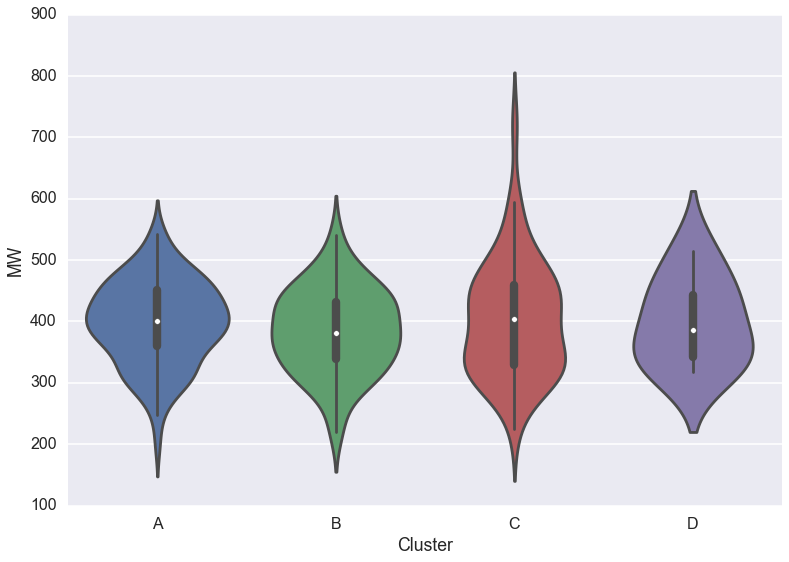

In [26]:
sns.violinplot(data=df, y="MW", x="Cluster", order=fake_clusters);